In [5]:
file_name = "another_configuration_mappnig_test.ipynb"
import sys
import os
sys.path.insert(0, os.path.abspath(
    os.path.join(os.path.dirname(file_name), '../../src/') ))

from configuration_space_mapping import *
from utils import *

import matplotlib.pyplot as plt
from matplotlib.collections import PatchCollection
from matplotlib.patches import Polygon
import numpy as np

# The Ultimate Test

In [6]:
client_id = connect_2_sim()
test_connection(client_id)

Connected to remote API server
Number of objects in the scene:  42


In [7]:
scene_objects = ['Cuboid_0','Cuboid_1','Cuboid_2',
                 'Cuboid_3','Cuboid_4','./dr20']
robot_name = './dr20'

In [8]:
patches = mapping(client_id=client_id, scene_objects=scene_objects, robot_name=robot_name)

points bounding box around robot: [array([-1.87686565,  1.61792656, -0.0170195 ]), array([-1.87684672,  1.84339533, -0.01702362]), array([-2.17377403,  1.84342027, -0.01642811]), array([-2.17379296,  1.61795151, -0.01642399])]
normals bounding box around robot: [6.283063669992957, 1.5706746896083716, 3.1414710164033717, 4.712267343197958]
inverted normals bounding box around robot: [3.141471016403164, 4.712267343198165, 6.283063669993164, 1.5706746896081645]
 
points bounding box around cuboid0: [array([-1.47499979e+00,  5.00000359e-01,  6.05516229e-08]), array([-1.97499979e+00,  5.00000359e-01,  6.05621596e-08]), array([-1.97499979e+00,  3.58580115e-07,  5.86576666e-08]), array([-1.47499979e+00,  3.58580115e-07,  5.86471299e-08])]
normals bounding box around cuboid0: [1.570796330603986, 3.1415926573989856, 4.712388984193986, 3.808986015485516e-09]
 
        normals  normal_order owner
7  3.808986e-09             4     o
3  1.570675e+00             4     r
4  1.570796e+00             1

In [9]:
patches[4].xy

array([[ 5.47379292, -1.41795134],
       [ 5.1768656 , -1.4179264 ],
       [ 4.1768656 , -1.4179264 ],
       [ 4.17684667, -1.64339516],
       [ 4.17684667, -2.64339516],
       [ 4.47377398, -2.64342011],
       [ 5.47377398, -2.64342011],
       [ 5.47379292, -2.41795134],
       [ 5.47379292, -1.41795134]])

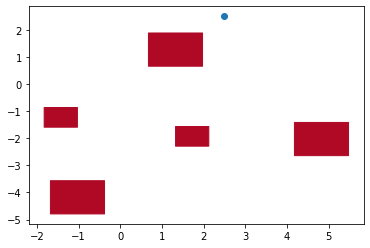

In [10]:
nfloors = len(patches)
cmap = plt.get_cmap('RdYlBu')
colors = cmap(nfloors) # convert nfloors to colors that we can use later

fig,ax = plt.subplots(1)
collection = PatchCollection(patches)
ax.add_collection(collection)
ax.scatter(2.5,2.5)
collection.set_color(colors)
ax.autoscale_view()
plt.show()

# Creatin the function that creates the normals dataframe

In [ ]:
client_id = connect_2_sim()
test_connection(client_id)

Connected to remote API server
Number of objects in the scene:  42


In [ ]:
scene_objects = ['Cuboid_0','Cuboid_1','Cuboid_2',
                 'Cuboid_3','Cuboid_4','./dr20']
robot_name = './dr20'

In [ ]:
listazinha = get_scene_objects_info(client_id, scene_objects)
info_list, robot_information = split_robot_from_info_list(listazinha,robot_name)

In [ ]:
inverted_normals_robot, global_coordin_corners_robot = get_robot_info_for_mapping(client_id,robot_name,robot_information=robot_information)

points bounding box around robot: [array([-1.87693175,  1.61671554, -0.01701785]), array([-1.87692346,  1.84218385, -0.01702311]), array([-2.17384808,  1.84219478, -0.01642474]), array([-2.17385637,  1.61672647, -0.01641948])]
normals bounding box around robot: [6.283112188173805, 1.5707232077892188, 3.141519534584219, 4.712315861378805]
inverted normals bounding box around robot: [3.141519534584011, 4.712315861379012, 6.2831121881740115, 1.5707232077890116]
 


In [ ]:
expected_robot_corners = np.array([[-1.88,  1.62],
                                   [-1.88,  1.84],
                                   [-2.17,  1.84],
                                   [-2.17,  1.62]])
expected_robot_inverted_normals = np.array([3.14, 4.71, 6.28, 1.57])                                   
assert (np.round(global_coordin_corners_robot,2)[:,:2] == expected_robot_corners).all()
assert (np.round(inverted_normals_robot,2) == expected_robot_inverted_normals).all

In [ ]:
# OBSTACLE STUFF, FOR 1 OBSTACLE ONLY
# I need to retrieve the global coordinates and normals of an obstacle. Let's suppose the Cuboid_0 for this test

cuboid_number = 0
normals_cuboid, global_coordinates_cuboid = get_obstacle_info_for_mapping(client_id,cuboid_number,info_list)


points bounding box around cuboid0: [array([-1.47499979e+00,  5.00000358e-01,  6.03742199e-08]), array([-1.97499979e+00,  5.00000358e-01,  6.03677483e-08]), array([-1.97499979e+00,  3.58394208e-07,  5.88350696e-08]), array([-1.47499979e+00,  3.58394208e-07,  5.88415413e-08])]
normals bounding box around cuboid0: [1.5707963298603573, 3.141592656655357, 4.712388983450357, 3.0653573013239566e-09]


In [ ]:
expect_obstacle_normals = np.array([1.57, 3.14, 4.71, 0.  ])
expected_obstacle_corners = np.array([[-1.47,  0.5 ],
                                      [-1.97,  0.5 ],
                                      [-1.97,  0.  ],
                                      [-1.47,  0.  ]])
assert (np.round(normals_cuboid,2)==expect_obstacle_normals).all()                                      
assert (np.round(global_coordinates_cuboid, 2)[:,:2] == expected_obstacle_corners).all()

In [ ]:
dframe_normals = get_normals_dataframe(inverted_normals_robot, normals_cuboid)
dframe_normals

 
        normals  normal_order owner
7  3.065357e-09             4     o
3  1.570723e+00             4     r
4  1.570796e+00             1     o
0  3.141520e+00             1     r
5  3.141593e+00             2     o
1  4.712316e+00             2     r
6  4.712389e+00             3     o
2  6.283112e+00             3     r
 


,normals,normal_order,owner
7,3.065357e-09,4,o
3,1.570723e+00,4,r
4,1.570796e+00,1,o
0,3.141520e+00,1,r
5,3.141593e+00,2,o
1,4.712316e+00,2,r
6,4.712389e+00,3,o
2,6.283112e+00,3,r


In [ ]:
old_index = [pd.Series([0,1,2,3,4,5,6,7])]
points = mapping_loop(dframe_normals.set_index(old_index),
                      global_coordin_corners_robot,
                      global_coordinates_cuboid)
points = np.array(points)

o -> r | b4-a4
r -> o | b1-a4
o -> r | b1-a1
r -> o | b2-a1
o -> r | b2-a2
r -> o | b3-a2
o -> r | b3-a3
r -> o | b4-a3


In [ ]:
centro_do_obstaculo = np.array(info_list[cuboid_number]['object_position'])
c_corners = points + centro_do_obstaculo

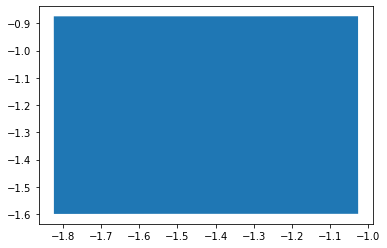

In [ ]:
fig,ax = plt.subplots(1)

patches = []
polygon = Polygon(c_corners[:,:2],closed=True)
patches.append(polygon)
collection = PatchCollection(patches)

ax.add_collection(collection)
ax.autoscale_view()
plt.show()

# Testing the Mapping function

In [16]:
client_id = connect_2_sim()
test_connection(client_id)

Connected to remote API server
Number of objects in the scene:  42


In [28]:
scene_objects = ['Cuboid_0','Cuboid_1','Cuboid_2',
                 'Cuboid_3','Cuboid_4','./dr20']
robot_name = './dr20'
lista_de_vertices = mapping(client_id=client_id, scene_objects=scene_objects, robot_name=robot_name)

points bounding box around robot: [array([-1.87114514,  1.68972421, -0.01718427]), array([-1.87791116,  1.91509088, -0.01720443]), array([-2.17470187,  1.9061806 , -0.01660132]), array([-2.16793584,  1.68081392, -0.01658116])]
normals bounding box around robot: [0.030112461247819855, 1.6009087880428199, 3.1717051148378195, 4.742501441632406]
inverted normals bounding box around robot: [3.1717051148376125, 4.742501441632613, 0.030112461248026114, 1.6009087880426127]
 
points bounding box around cuboid0: [array([-1.47499978e+00,  5.00000370e-01,  7.22762636e-08]), array([-1.97499978e+00,  5.00000370e-01,  7.09111615e-08]), array([-1.97499978e+00,  3.69617134e-07,  4.69330265e-08]), array([-1.47499978e+00,  3.69616739e-07,  4.82981286e-08])]
normals bounding box around cuboid0: [1.57079637475127, 3.1415927015462697, 4.712389028341271, 4.795627006615177e-08]
 
        normals  normal_order owner
7  4.795627e-08             4     o
2  3.011246e-02             3     r
4  1.570796e+00        

In [18]:
v_list_np = np.array(lista_de_vertices)

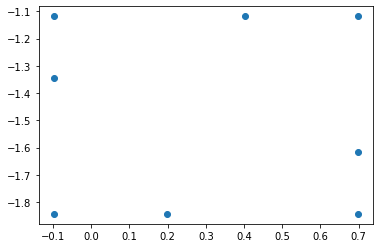

In [19]:
plt.scatter(v_list_np[:,0], v_list_np[:,1])

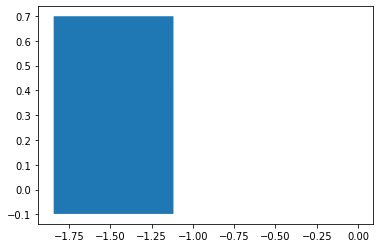

In [20]:
plt.fill_betweenx(v_list_np[:,0],v_list_np[:,1])

# Debugging `mapping_loop()`

## These parameters were found during a test I did in 6th Jun

In [21]:
global_coordinates_cuboid = [np.array([-1.47499979e+00,  5.00000360e-01,  6.24157246e-08]), 
                             np.array([-1.97499979e+00,  5.00000360e-01,  6.17008973e-08]), 
                             np.array([-1.97499979e+00,  3.60081535e-07,  5.67935650e-08]), 
                             np.array([-1.47499979e+00,  3.60081535e-07,  5.75083923e-08])]
global_coordin_corners_robot = [np.array([-1.8764059 ,  1.62417155, -0.01703672]), 
                                np.array([-1.87667144,  1.84963994, -0.01704005]), 
                                np.array([-2.17359744,  1.84929024, -0.01644217]), 
                                np.array([-2.1733319 ,  1.62382185, -0.01643884])]

data = {'normals':[9.814665e-09,1.117424e-03,1.570796e+00,1.571914e+00,3.141593e+00,3.142710e+00,4.712389e+00,4.713506e+00], 
        'normal_order':[4,3,1,4,2,1,3,2],
        'owner':['o','r','o','r','o','r','o','r']}

dframe = pd.DataFrame.from_dict(data)                                

In [22]:
a = mapping_loop(dframe=dframe,
                 corners_robot=global_coordin_corners_robot,
                 corners_obstacle=global_coordinates_cuboid)
a_np = np.array(a)

o -> r | b4-a3
r -> o | b1-a3
o -> r | b1-a4
r -> o | b2-a4
o -> r | b2-a1
r -> o | b3-a1
o -> r | b3-a2
r -> o | b4-a2


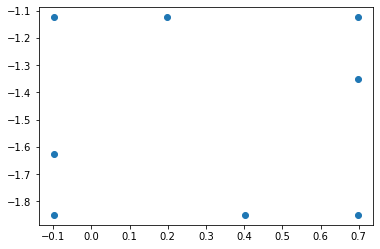

In [23]:
plt.scatter(a_np[:,0],a_np[:,1])

## These parameters were found during a test I did in 7th Jun

In [24]:
data_2 = {'normals':[4.056378e-09, 1.570740e+00,1.570796e+00,3.141537e+00, 3.141593e+00,4.712333e+00, 4.712389e+00, 6.283129e+00], 
        'normal_order':[4,4,1,1,2,2,3,3],
        'owner':['o','r','o','r','o','r','o','r']}
dframe_2 = pd.DataFrame.from_dict(data_2)   
a_2 = mapping_loop(dframe=dframe_2, corners_robot=global_coordin_corners_robot, corners_obstacle=global_coordinates_cuboid)
a_2_np = np.array(a_2)

o -> r | b4-a4
r -> o | b1-a4
o -> r | b1-a1
r -> o | b2-a1
o -> r | b2-a2
r -> o | b3-a2
o -> r | b3-a3
r -> o | b4-a3


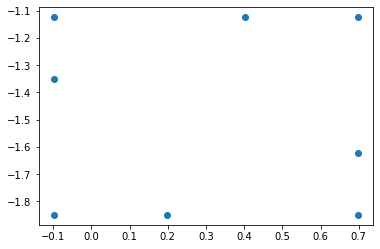

In [25]:
plt.scatter(a_2_np[:,0],a_2_np[:,1]) 
# the noise does not change the shape of the polygon, only some positions of colinear vertices

## Another test (9 jun)

In [ ]:
data_0 = {'normals':[3.314855e-09, 1.570702e+00, 1.570796e+00, 3.141498e+00, 3.141593e+00, 4.712295e+00, 4.712389e+00, 6.283091e+00], 
        'normal_order':[4,4,1,1,2,2,3,3],
        'owner':['o','r','o','r','o','r','o','r']}
dframe_0 = pd.DataFrame.from_dict(data_0)   
dframe_0

,normals,normal_order,owner
0,3.314855e-09,4,o
1,1.570702e+00,4,r
2,1.570796e+00,1,o
3,3.141498e+00,1,r
4,3.141593e+00,2,o
5,4.712295e+00,2,r
6,4.712389e+00,3,o
7,6.283091e+00,3,r


In [ ]:
a_0 = mapping_loop(dframe=dframe_0,
                 corners_robot=global_coordin_corners_robot,
                 corners_obstacle=global_coordinates_cuboid)
a_0_np = np.array(a_0)

o -> r | b4-a4
r -> o | b1-a4
o -> r | b1-a1
r -> o | b2-a1
o -> r | b2-a2
r -> o | b3-a2
o -> r | b3-a3
r -> o | b4-a3
